# An Algorithm for Least-Squares Estimation of Nonlinear Parameters


## Importing Libraries

In [221]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline
from matplotlib.transforms import BlendedGenericTransform
# %matplotlib notebook

# Simple Non-Linear least squares for Gaussian function


## Defining a non-linear function

In [136]:
def gaussian(x,a,m,s):
        return a*np.exp(-np.square(x-m)/(2*s*s))

def get_deriv(x,a,m,s,y,pred):
    pred_deriv = np.array([gaussian(x,a,m,s)/a,((x-m)/(s*s))*gaussian(x,a,m,s),(np.square(x-m)/(s*s*s))*gaussian(x,a,m,s)])
    return pred_deriv

## Helper function for plots

In [208]:
global_ax = []

AttributeError: 'list' object has no attribute 'get_data'

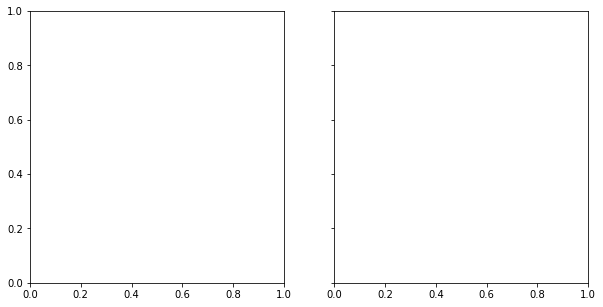

In [228]:
fig3, (ax3, ax4) = plt.subplots(1,2,sharey=True, sharex=True,figsize=(10,5))

# Plot data from fig1 and fig2
line3, = ax3.plot((global_ax[0][1]).get_data()[0], (global_ax[0][1]).get_data()[1])
line4, = ax4.plot(global_ax[11].get_data()[0], global_ax[11].get_data()[1])
# If possible (easy access to plotting data) use
# ax3.plot(x, y1)
# ax4.lpot(x, y2)

ax3.set_ylabel('y-axis')
ax3.grid(True)
ax4.grid(True)

# Add legend
fig3.legend((line3, line4),
            ('Observation 0', 'Observation 11'),
            loc = 'upper center',
            bbox_to_anchor = [0.5, -0.05],
            bbox_transform = BlendedGenericTransform(fig3.transFigure, ax3.transAxes))
# Make space for the legend beneath the subplots
plt.subplots_adjust(bottom = 0.2)
# Show only fig3
fig3.show()

In [234]:
def show_results(X,Y,pred,cf,st,save=None):
    global global_ax
    l = np.arange(0,len(cf),1)
    fig = plt.figure(figsize = [25,10], dpi = 60)
    ax = fig.add_subplot(121)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    line1 = ax.plot(X,10-Y,'b')
#     ax.set_title('Input Distribution', fontsize = 30)
#     ax1 = fig.add_subplot(132)
#     ax1.tick_params(axis='x', labelsize=22)
#     ax1.tick_params(axis='y', labelsize=22)
    ax.plot(X,10-pred,linestyle = '-.',color='r')
    ax.legend(['Input Distribution','Predicted Distribution'])
    ax.set_title(st,fontsize = 25)
#     ax1.set_title('Predicted Distribution', fontsize = 30)
    ax2 = fig.add_subplot(122)
    ax2.tick_params(axis='x', labelsize=22)
    ax2.tick_params(axis='y', labelsize=22)
    line2 = ax2.plot(l,cf)
    ax2.set_title('Objective Fn vs Iterations', fontsize = 15)
    if save:
        plt.savefig(str(save) + '.png')
    global_ax.append([line1, line2])
    plt.show()

## Initialising the parameters for Gaussian input

In [235]:
xa = 10
xm = 0
xs = 20
x = np.linspace(-20,20,150)
y = gaussian(x,xa,xm,xs)



# I) Gradient Descent Method

In [139]:
def gradient_descent(lr,k,itr,x,y,threshold):
    cf = []
    for i in range(itr):
        k_old = k
        r_ = 0.0
        for j in range(x.shape[0]):
            pred = gaussian(x[j],k[0],k[1],k[2])
            r = pred-y[j]
            r_ = r_ + r*r
            pred_deriv = get_deriv(x[j],k[0],k[1],k[2],y[j],pred)
            Jr = 2*(pred-y[j])*pred_deriv
            del_k = -lr*Jr
            k = k + del_k
        cf.append(r_)
        if(np.linalg.norm(k-k_old)<threshold):
#            print("quit")
            print("Converged at " + str(i) + "th iteration")
            break    
    return k, cf
    


In [140]:
lr = 0.02
k = np.ones(3)
threshold = 1e-15
itr = 800
print("Baseline Results")
param_gd, cf_gd = gradient_descent(lr,k,itr,x,y,threshold)
print(param_gd)

print("\nExperiment 1 Plots: Different Initial Estimate ")
k_new = [5,10,15]
param_gd1, cf_gd1 = gradient_descent(lr,k_new,5000,x,y,threshold)
print(param_gd1)

print("\nExperiment 2 Plots: Different Number of Observations")
nx = np.linspace(-25,25,50)
ny = gaussian(nx,10,0,20)
# nx = x
# ny = y
param_gd2, cf_gd2 = gradient_descent(lr,k,5000,nx,ny,threshold)
print(param_gd2)

print("\nExperiment 3 Plots: Added Noise")
noise = np.random.normal(0.5,0.2,len(x))
noise_y = y + 1*noise
param_gd3, cf_gd3 = gradient_descent(lr,k,5000,x,noise_y,threshold)
print(param_gd3)

Baseline Results
Converged at 384th iteration
[1.00000000e+01 1.40640799e-13 2.00000000e+01]

Experiment 1 Plots: Different Initial Estimate 
Converged at 407th iteration
[ 1.00000000e+01 -1.40501373e-13  2.00000000e+01]

Experiment 2 Plots: Different Number of Observations
Converged at 622th iteration
[1.00000000e+01 5.06305005e-14 2.00000000e+01]

Experiment 3 Plots: Added Noise
Converged at 461th iteration
[10.43511843  0.09815012 20.82217711]


# Gauss Newton Method

In [141]:
def gauss_newton(lr,k,itr,x,y,threshold):
    cf = []
    for i in range(itr):
        k_old = k
        r_ = 0.0
        for j in range(x.shape[0]):
            pred = gaussian(x[j],k[0],k[1],k[2])
            r = pred - y[j]
            r_ = r_ + r*r
            pred_deriv = get_deriv(x[j],k[0],k[1],k[2],y[j],pred)
            Jr = 2*(pred-y[j])*pred_deriv
            mag = np.linalg.norm(pred_deriv,ord=None)
            del_k = -lr*Jr/mag
            k = k + del_k
        cf.append(r_)
        if(np.linalg.norm(k-k_old)<threshold):
#            print("quit")
            print("Converged at " + str(i) + "th iteration")
            break    
    return k, cf
    
lr = 0.02
k = np.ones(3)
threshold = 1e-15
itr = 1000
print("\nBaseline Results")
param_gn, cf_gn = gauss_newton(lr,k,itr,x,y,threshold)
print(param_gn)

print("\nExperiment 1 Plots: Different Initial Estimate ")
param_gn1, cf_gn1 = gauss_newton(lr,k_new,5000,x,y,threshold)
print(param_gn1)

print("\nExperiment 2 Plots: Different Number of Observations")
param_gn2, cf_gn2 = gauss_newton(lr,k,5000,nx,ny,threshold)
print(param_gn2)

print("\nExperiment 3 Plots: Added Noise")
param_gn3, cf_gn3 = gauss_newton(lr,k,itr,x,noise_y,threshold)
print(param_gn3)



Baseline Results
Converged at 339th iteration
[1.00000000e+01 1.12968359e-13 2.00000000e+01]

Experiment 1 Plots: Different Initial Estimate 
Converged at 356th iteration
[ 1.00000000e+01 -1.13858597e-13  2.00000000e+01]

Experiment 2 Plots: Different Number of Observations
Converged at 489th iteration
[1.0000000e+01 4.2124977e-14 2.0000000e+01]

Experiment 3 Plots: Added Noise
Converged at 401th iteration
[10.43640872  0.09519681 20.81262896]


# The Levenberg-Marquardt Method

In [142]:
def LM(lr,k,itr,x,y,threshold,lamda):
    cf = []
    for i in range(itr):
        k_old = k
        r_ = 0
        for j in range(x.shape[0]):
            pred = gaussian(x[j],k[0],k[1],k[2])
            r = pred-y[j]
            r_ = r_ + r*r
            pred_deriv = get_deriv(x[j],k[0],k[1],k[2],y[j],pred)
            Jr = 2*(pred-y[j])*pred_deriv
            mag = np.linalg.norm(pred_deriv,ord=None)
            del_k = -lr*Jr/(mag+lamda)
            k = k + del_k
        cf.append(r_)
        if(np.linalg.norm(k-k_old)<threshold):
 #           print("quit")
            print("Converged at " + str(i) + "th iteration")
            break    
    return k, cf
    
lr = 0.02
k = np.ones(3)
threshold = 1e-15
itr = 1000
lamda = 1e-2
print("\nBaseline Results")
param_lm, cf_lm = LM(lr,k,itr,x,y,threshold,lamda)
print(param_lm)

print("\nExperiment 1 Plots: Different Initial Estimate ")
param_lm1, cf_lm1 = LM(lr,k_new,5000,x,y,threshold,lamda)
print(param_lm1)

print("\nExperiment 2 Plots: Different Number of Observations")
param_lm2, cf_lm2 = LM(lr,k,5000,nx,ny,threshold,lamda)
print(param_lm2)

print("\nExperiment 3 Plots: Added Noise")
param_lm3, cf_lm3 = LM(lr,k,itr,x,noise_y,threshold,lamda)
print(param_lm3)


Baseline Results
Converged at 335th iteration
[1.00000000e+01 1.17801794e-13 2.00000000e+01]

Experiment 1 Plots: Different Initial Estimate 
Converged at 360th iteration
[ 1.00000000e+01 -1.15565675e-13  2.00000000e+01]

Experiment 2 Plots: Different Number of Observations
Converged at 495th iteration
[1.00000000e+01 4.24537534e-14 2.00000000e+01]

Experiment 3 Plots: Added Noise
Converged at 401th iteration
[10.43633693  0.09523321 20.81315715]


# Plots


Baseline Plots

a. Gradient Descent


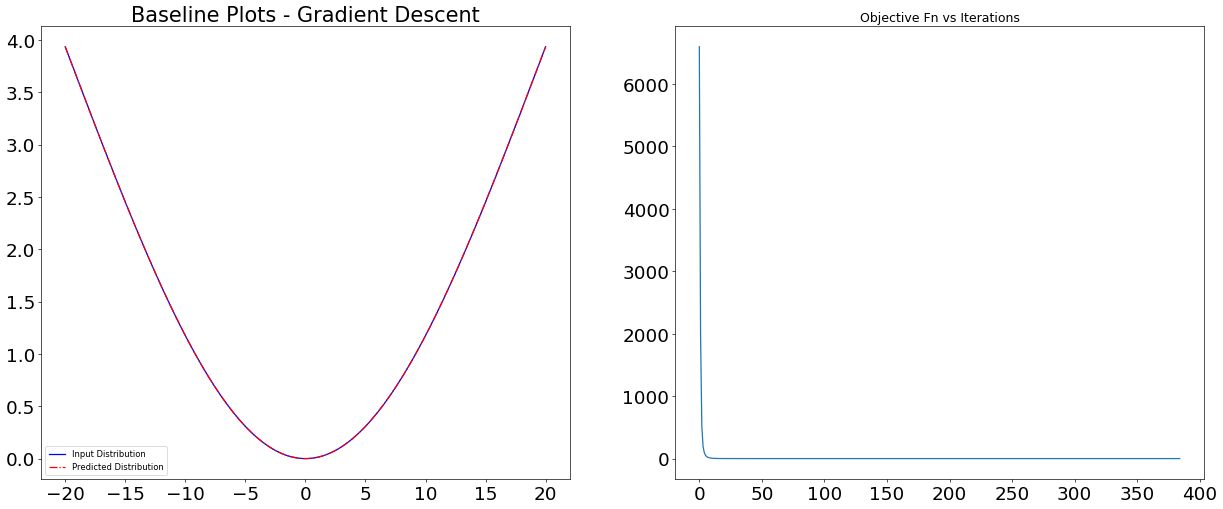

b. Gauss Newton


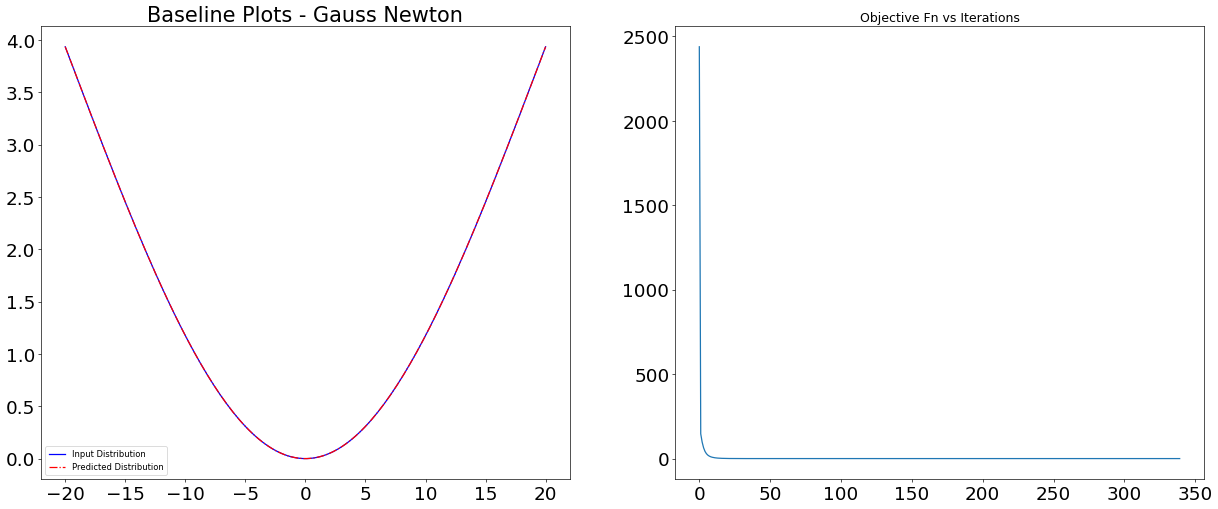

c. Levenberg Marquardt


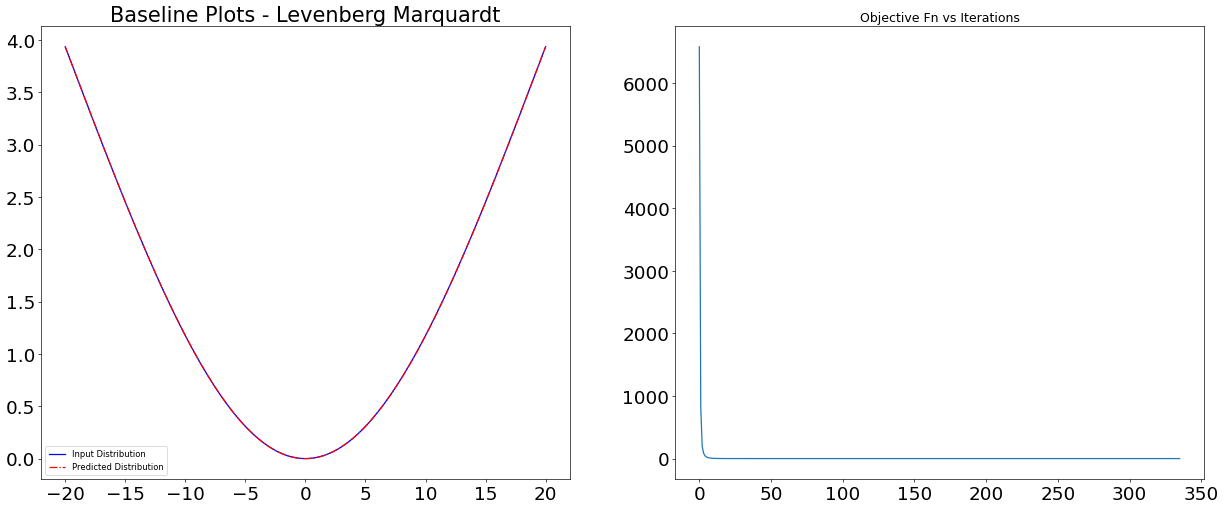


Experiment 1 Plots: Different Initial Estimate

a. Gradient Descent


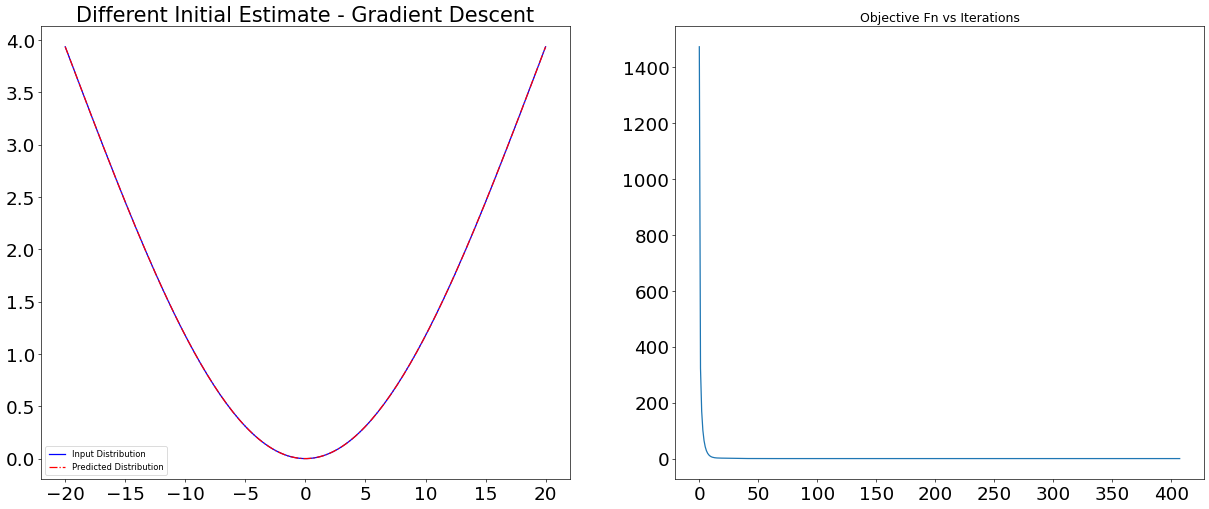

b. Gauss Newton


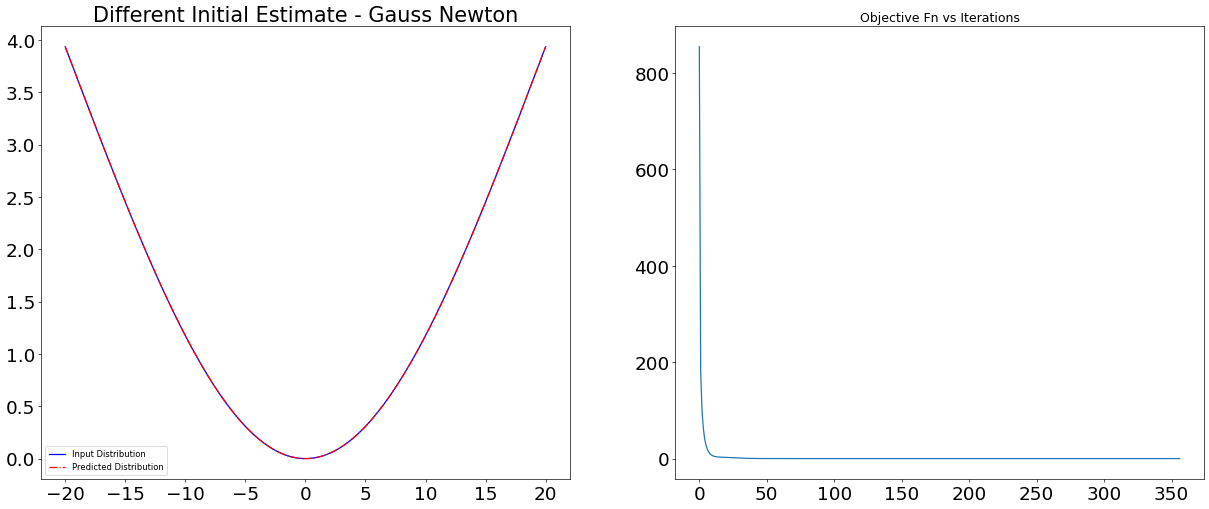

c. Levenberg Marquardt


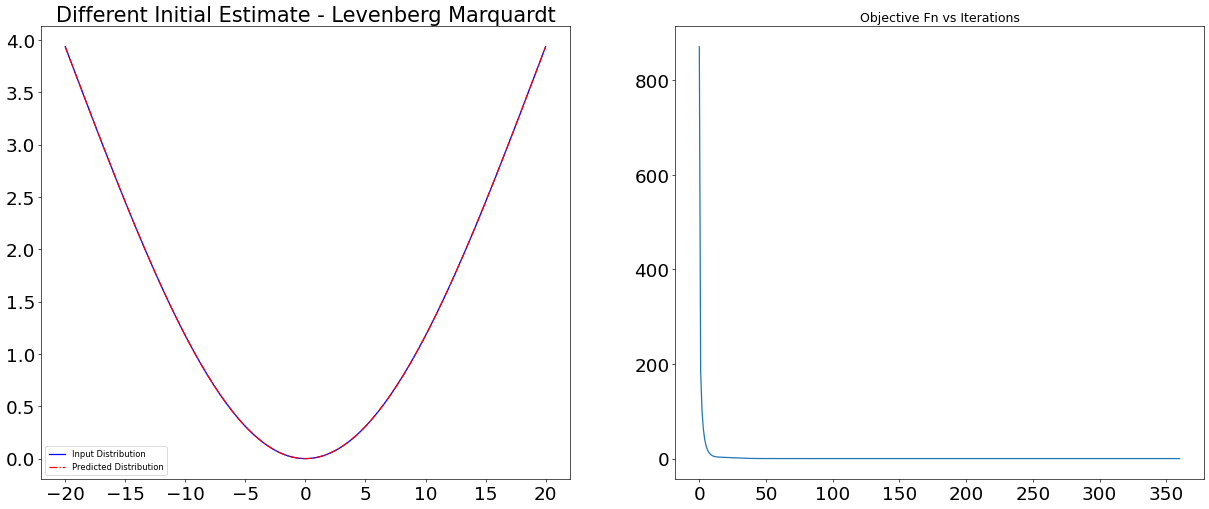


Experiment 2 Plots: Different Number of Observations

a. Gradient Descent


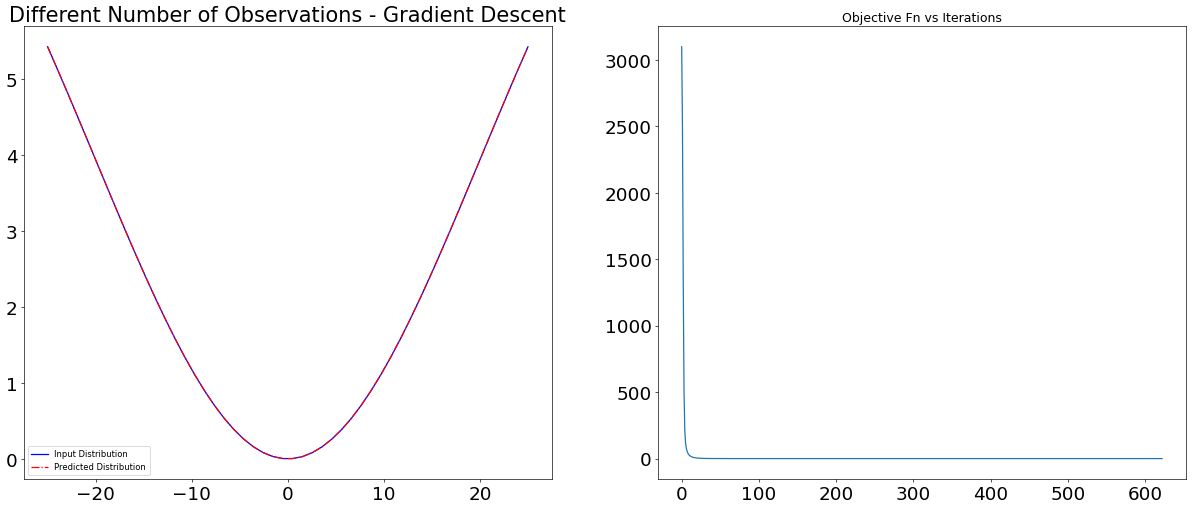

b. Gauss Newton


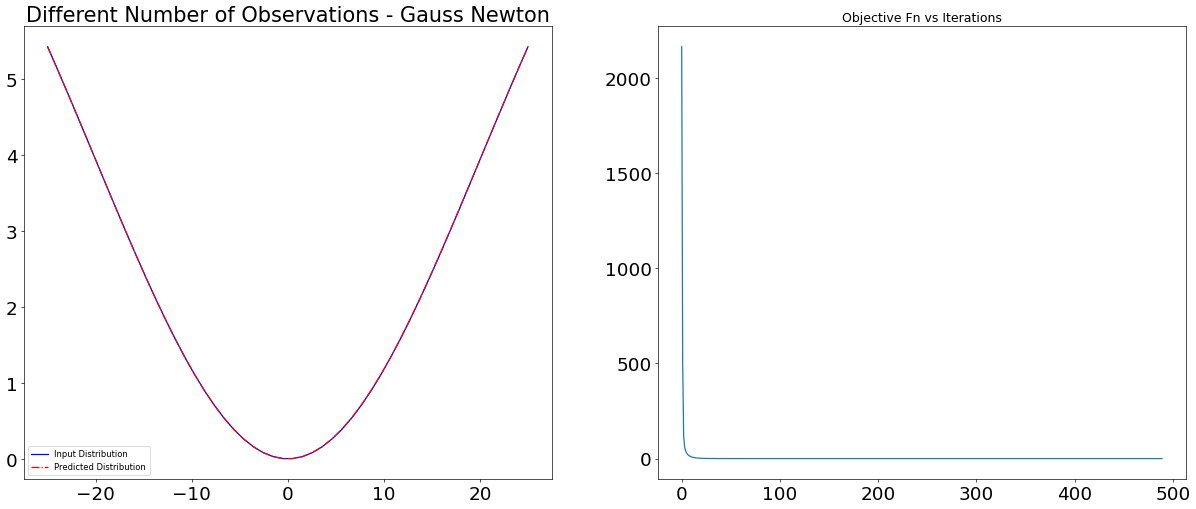

c. Levenberg Marquardt


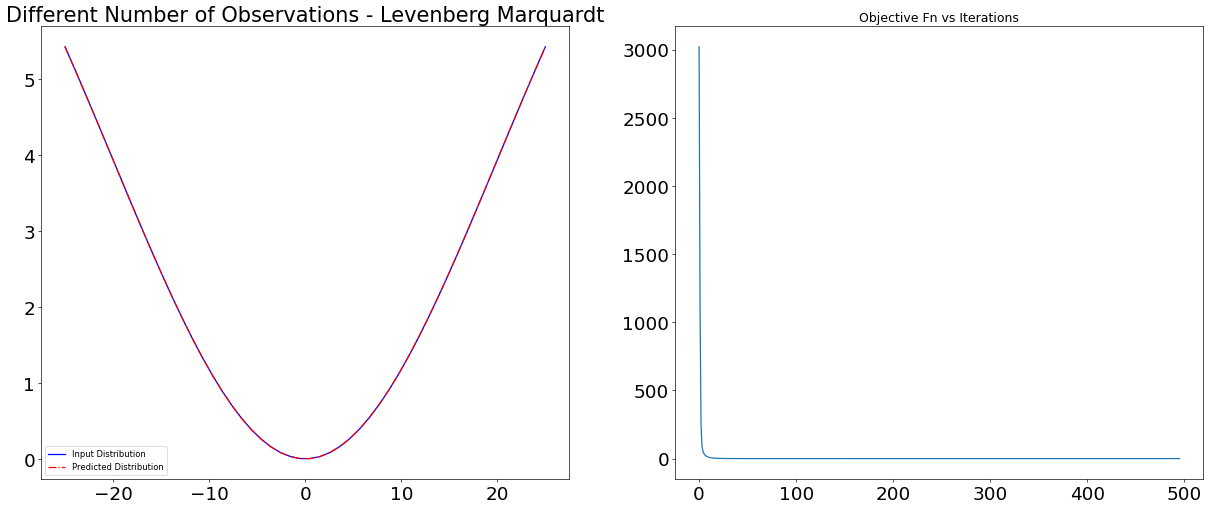


Experiment 3 Plots: Added Noise

a. Gradient Descent


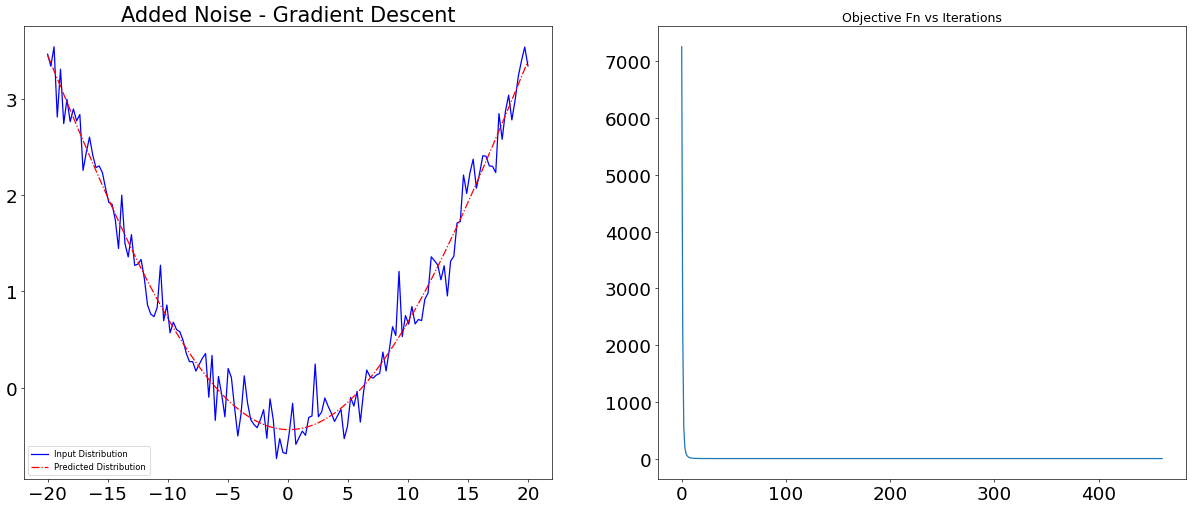

b. Gauss Newton


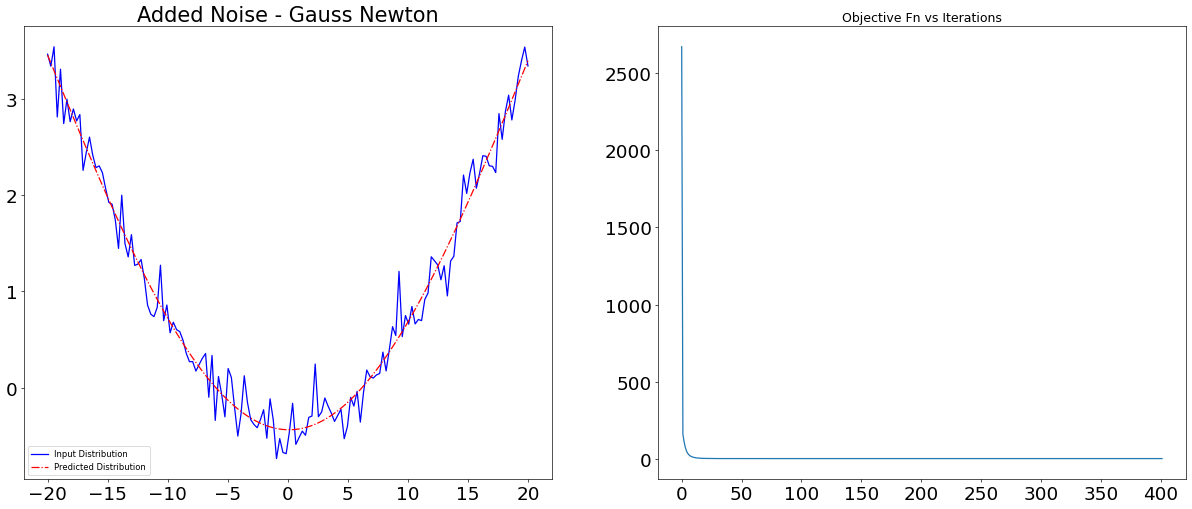

c. Levenberg Marquardt


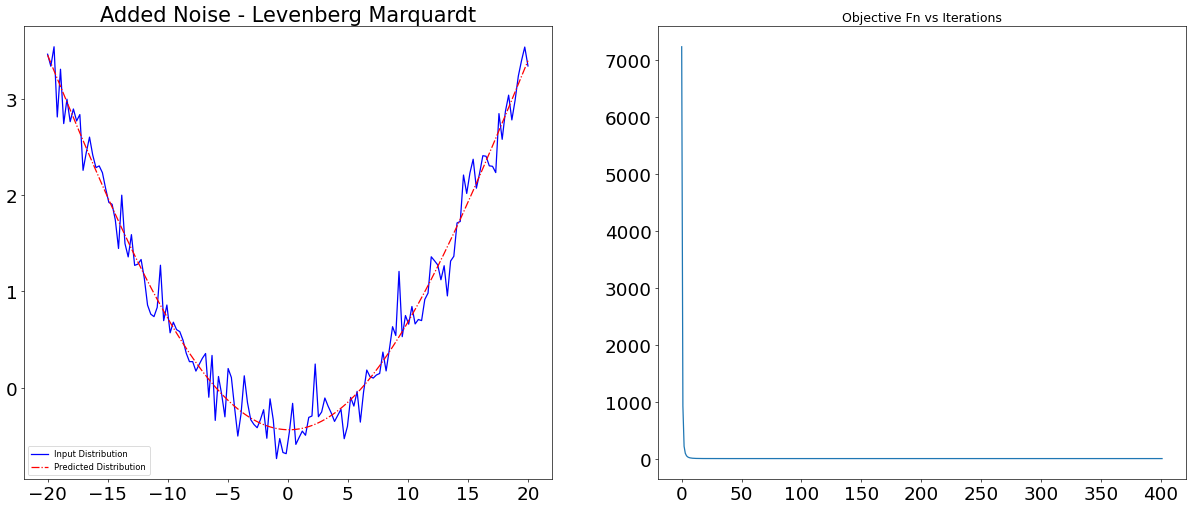

In [238]:
global_ax = []
print("\nBaseline Plots\n")
a = "Baseline Plots - "
print("a. Gradient Descent")
b = "Gradient Descent"
pred_gd = gaussian(x,param_gd[0],param_gd[1],param_gd[2])
show_results(x,y,pred_gd,cf_gd,a+b,9)
print("b. Gauss Newton")
b = "Gauss Newton"
pred_gn = gaussian(x,param_gn[0],param_gn[1],param_gn[2])
show_results(x,y,pred_gn,cf_gn,a+b,5)
print("c. Levenberg Marquardt")
b = "Levenberg Marquardt"
pred_lm = gaussian(x,param_lm[0],param_lm[1],param_lm[2])
show_results(x,y,pred_lm,cf_lm,a+b,1)

print("\nExperiment 1 Plots: Different Initial Estimate\n")
a = "Different Initial Estimate - "
print("a. Gradient Descent")
b = "Gradient Descent"
pred_gd1 = gaussian(x,param_gd1[0],param_gd1[1],param_gd1[2])
show_results(x,y,pred_gd1,cf_gd1,a+b,10)
print("b. Gauss Newton")
b = "Gauss Newton"
pred_gn1 = gaussian(x,param_gn1[0],param_gn1[1],param_gn1[2])
show_results(x,y,pred_gn1,cf_gn1,a+b,6)
print("c. Levenberg Marquardt")
b = "Levenberg Marquardt"
pred_lm1 = gaussian(x,param_lm1[0],param_lm1[1],param_lm1[2])
show_results(x,y,pred_lm1,cf_lm1,a+b,2)

print("\nExperiment 2 Plots: Different Number of Observations\n")
a = "Different Number of Observations - "
print("a. Gradient Descent")
b = "Gradient Descent"
pred_gd2 = gaussian(nx,param_gd2[0],param_gd2[1],param_gd2[2])
show_results(nx,ny,pred_gd2,cf_gd2,a+b,11)
print("b. Gauss Newton")
b = "Gauss Newton"
pred_gn2 = gaussian(nx,param_gn2[0],param_gn2[1],param_gn2[2])
show_results(nx,ny,pred_gn2,cf_gn2,a+b,7)
print("c. Levenberg Marquardt")
b = "Levenberg Marquardt"
pred_lm2 = gaussian(nx,param_lm2[0],param_lm2[1],param_lm2[2])
show_results(nx,ny,pred_lm2,cf_lm2,a+b,3)

print("\nExperiment 3 Plots: Added Noise\n")
a = "Added Noise - "
print("a. Gradient Descent")
b = "Gradient Descent"
pred_gd3 = gaussian(x,param_gd3[0],param_gd3[1],param_gd3[2])
show_results(x,noise_y,pred_gd3,cf_gd3,a+b,12)
print("b. Gauss Newton")
b = "Gauss Newton"
pred_gn3 = gaussian(x,param_gn3[0],param_gn3[1],param_gn3[2])
show_results(x,noise_y,pred_gn3,cf_gn3,a+b,8)
print("c. Levenberg Marquardt")
b = "Levenberg Marquardt"
pred_lm3 = gaussian(x,param_lm3[0],param_lm3[1],param_lm3[2])
show_results(x,noise_y,pred_lm3,cf_lm3,a+b,4)
##############################################################################


### Results of Experiments

1. No. of Iterations

| Algorithm          | Baseline            | Experiment 1  | Experiment 2  | Experiment 3 |
| ------------- |:-------------:| -------:|-------:|-------:|
| Gradient Descent      |   631  | 1985|2835|682|
| Gauss Newton      | 500     | 1797|2212|548|
| Levenberg Marquardt      | 506      | 1814 |2244|524|

2. Results for Baseline

| Algorithm          | Baseline            | Experiment 1  | Experiment 2  | Experiment 3 |
| ------------- |:-------------:| -------:|-------:|-------:|
| Gradient Descent     | [1.00000000e+01 9.48710655e-14 2.00000000e+01]   | [ 1.00000000e+01 -9.41189848e-14  2.00000000e+01] | [1.00000000e+01 3.17749471e-14 2.00000000e+01] | [10.084082    0.03703482 20.14340391] |
| Gauss Newton     | [1.00000000e+01 7.76197826e-14 2.00000000e+01]      |[ 1.00000000e+01 -7.75397235e-14  2.00000000e+01]|[1.00000000e+01 2.60091241e-14 2.00000000e+01]|[10.08446088  0.03270207 20.14143413]|
| Levenberg Marquardt | [1.00000000e+01 7.79451555e-14 2.00000000e+01]      | [ 1.00000000e+01 -7.81070048e-14  2.00000000e+01]   |[1.00000000e+01 2.61764634e-14 2.00000000e+01]|[10.08443801  0.03275612 20.14155028]|


**Observations**

* Gauss Newton and Levenberg Marquardt methods have a normalisation proportional to the gradient magnitude while Gradient Descent has no normalisation on the gradient. So very large gradients are normalised such that they do not cause oscillations and very small gradients are boosted for updates. 
* Results of Gauss Newton and Levinberg Marquardt methods are better than Gradient Descent, which is also shown in the result table. That is because we use 2nd order terms to estimate gradient for LM and GN whereas we use 1st order terms for GD. 
* For noisy samples, results are a little different from the ground truth values but there is no effect on the rate of convergence.
* In experiment 1, when we make different initialisation, then we need more number of iterations to converge  and this also involves some sudden drops in the cost versus iteration maps. That is because here we are approximating an exponential function and our initialisation is far away. So initially, predictions values will come closer to ground truth rapidly.
* Gauss Newton has a normalisation of magnitude of gradient, whereas Levinberg Marquardt has a normalisation of ($\lambda$ + magnitude of gradient). For some cases(depending on whether $\lambda$ is greater than or less than magnitude of gradient) it can wrongly increase or decrease gradients, which leads to more number of iterations convergence. 
* The number of iterations required to converge is in the order : Gauss-Newton > Levinberg Marquardt > Gradient Descent.
* The claims can be validated from the plots provided.